In [1]:
import pandas as pd
#Reading plk file into dataframe
apl_mw_pckl = pd.read_pickle('apple_mw_df_renamed.plk')
apl_mw_df=pd.DataFrame(apl_mw_pckl)
apl_mw_df.head()

,mw_title,mw_url,mw_raw_time,mw_text,mw_time_converted,timestamp
0,\n Biden’s Proposed Tax Hikes Raise the Risk ...,https://www.marketwatch.com/articles/bidens-pr...,"\n April 9, 2021 at 5:39 p.m. ET\n","In this world, nothing is certain except death...",2021-04-09 21:39:00+00:00,2021-04-09 21:00:00+00:00
1,\n Revolve stock plunges 15% as delta variant...,https://www.marketwatch.com/story/revolve-stoc...,"\n First Aug. 5, 2021 at 12:11 p.m. ET\n",Revolve Group Inc. stock plunged 15% on Thursd...,2021-08-05 16:11:00+00:00,2021-08-05 16:00:00+00:00
2,"\n The Bond Market Is Fighting the Fed, and Y...",https://www.marketwatch.com/articles/the-bond-...,"\n March 18, 2021 at 3:01 p.m. ET\n",Investors have long heeded an old adage: Don’t...,2021-03-18 19:01:00+00:00,2021-03-18 19:00:00+00:00
3,\n Pinterest Stock Is Rising Because Earnings...,https://www.marketwatch.com/articles/pinterest...,"\n First Nov. 4, 2021 at 3:54 p.m. ET\n",Shares of \n Pinterest\n were ris...,2021-11-04 19:54:00+00:00,2021-11-04 19:00:00+00:00
4,\n Tesla Partnership and Less Debt Can Drive ...,https://www.marketwatch.com/articles/tesla-deb...,"\n First Dec. 10, 2021 at 7:45 p.m. ET\n","These reports, excerpted and edited by Barron’...",2021-12-11 00:45:00+00:00,2021-12-11 00:00:00+00:00


In [3]:
apl_mw_df["combined_data"]=apl_mw_df['mw_title'].map(str) +" "+ apl_mw_df['mw_text'].map(str) 

In [5]:
apl_mw_df = apl_mw_df.sort_values("timestamp")

In [6]:
import re
def text_clean(data): 
    #cleans the data and converts number to POSNUM or NEGNUM
    p='POSNUM'
    n='NEGNUM'
    data = data.lower()
    data = re.sub(r"what's", "what is ", data)
    data = re.sub(r"\'s", " is ", data)
    data = re.sub(r"\'d"," would ",data)
    data = re.sub(r"\'ve", " have ", data)
    data = re.sub(r"\'ll", " will ", data)
    data = re.sub(r"\'re", " are ", data)
    data = re.sub(r"can't", "cannot ", data)
    data = re.sub(r"n't", " not ", data)
    data = re.sub(r"i'm", "i am ", data)
    data = re.sub(r'-\d*\.?\d',n,data)
    data = re.sub(r'\d*\.?\d',p,data)
    data = re.sub('[^A-Za-z0-9 ]+', '', data)
    data = data.strip()
    
    return data

In [7]:
from nltk.corpus import stopwords
def stopwords_removal(tokens):
    #removes top words
    final_sentence=[]
    stopwords_list=stopwords.words('english')
    for w in tokens:
        if w not in stopwords_list:
            final_sentence.append(w)
    return final_sentence

In [8]:
from nltk.tokenize import RegexpTokenizer
regtokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    #generates tokens
    return regtokenizer.tokenize(x)

In [9]:
from nltk.stem import WordNetLemmatizer
def wlemmatizer(x):
    #lemmatizes words
    lemm=WordNetLemmatizer()
    return ' '.join(lemm.lemmatize(w) for w in x)

In [10]:
#first clean the data
apl_mw_df["combined_data"]=apl_mw_df["combined_data"].map(text_clean)
#get tokens
apl_mw_df["tokens"]=apl_mw_df["combined_data"].map(tokenize)
#remove stopwords
apl_mw_df["tokens"]=apl_mw_df["tokens"].map(stopwords_removal)
#emmatize
apl_mw_df["lemmatized"]=apl_mw_df["tokens"].map(wlemmatizer)

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def senti_analysis(data):
    #generates polarity score
    return(analyser.polarity_scores(data)["compound"])

In [12]:
apl_mw_df["fulltext_sents"] = apl_mw_df["combined_data"].apply(senti_analysis) 
apl_mw_df["lemm_sents"] = apl_mw_df["lemmatized"].apply(senti_analysis) 

In [13]:
apl_mw_df.head()

,mw_title,mw_url,mw_raw_time,mw_text,mw_time_converted,timestamp,combined_data,tokens,lemmatized,fulltext_sents,lemm_sents
1671,\n Can’t Find that New iPhone? You’re Not Alo...,https://www.marketwatch.com/articles/cant-find...,"\n Oct. 19, 2016 at 1:35 p.m. ET\n",A month after the launch of \n Apple’s\...,2016-10-19 17:35:00+00:00,2016-10-19 17:00:00+00:00,cant find that new iphone youre not alone a mo...,"[cant, find, new, iphone, youre, alone, month,...",cant find new iphone youre alone month launch ...,0.9456,0.9432
223,\n Why Apple Pay Is Way More Secure Than a Cr...,https://www.marketwatch.com/articles/why-apple...,"\n First Oct. 19, 2016 at 2:56 p.m. ET\n",The simple advice you learned when you first b...,2016-10-19 18:56:00+00:00,2016-10-19 18:00:00+00:00,why apple pay is way more secure than a credit...,"[apple, pay, way, secure, credit, card, simple...",apple pay way secure credit card simple advice...,0.9410,0.9825
2396,"\n Apple: Sales of iPhone, iPad and Mac All S...",https://www.marketwatch.com/articles/apple-sal...,"\n Oct. 25, 2016 at 4:56 p.m. ET\n",\nApple’s\n most recent quarter was a du...,2016-10-25 20:56:00+00:00,2016-10-25 20:00:00+00:00,apple sales of iphone ipad and mac all shrink ...,"[apple, sales, iphone, ipad, mac, shrink, bett...",apple sale iphone ipad mac shrink better sign ...,0.7783,0.7506
994,\n Apple’s New MacBooks Leave Us Wanting More\n,https://www.marketwatch.com/articles/apples-ne...,"\n Oct. 27, 2016 at 8:36 p.m. ET\n",\nApple\n unveiled pretty new MacBook Pr...,2016-10-28 00:36:00+00:00,2016-10-28 00:00:00+00:00,apples new macbooks leave us wanting more appl...,"[apples, new, macbooks, leave, us, wanting, ap...",apple new macbooks leave u wanting apple unvei...,0.9937,0.9858
1005,\n Could Apple Buy Time Warner? Would It? Sho...,https://www.marketwatch.com/articles/could-app...,"\n Oct. 31, 2016 at 2:02 p.m. ET\n",\nAT&T\n has already offered $85 billion...,2016-10-31 18:02:00+00:00,2016-10-31 18:00:00+00:00,could apple buy time warner would it should it...,"[could, apple, buy, time, warner, would, att, ...",could apple buy time warner would att already ...,0.9647,0.9094


In [14]:
a_mw=apl_mw_df #creating replica of the df 

In [15]:
#dropping unwanted columns
a_mw.drop(['mw_title','mw_url','mw_raw_time','mw_text','mw_time_converted','tokens'],axis=1,inplace=True)

In [16]:
a_mw.head()

,timestamp,combined_data,lemmatized,fulltext_sents,lemm_sents
1671,2016-10-19 17:00:00+00:00,cant find that new iphone youre not alone a mo...,cant find new iphone youre alone month launch ...,0.9456,0.9432
223,2016-10-19 18:00:00+00:00,why apple pay is way more secure than a credit...,apple pay way secure credit card simple advice...,0.9410,0.9825
2396,2016-10-25 20:00:00+00:00,apple sales of iphone ipad and mac all shrink ...,apple sale iphone ipad mac shrink better sign ...,0.7783,0.7506
994,2016-10-28 00:00:00+00:00,apples new macbooks leave us wanting more appl...,apple new macbooks leave u wanting apple unvei...,0.9937,0.9858
1005,2016-10-31 18:00:00+00:00,could apple buy time warner would it should it...,could apple buy time warner would att already ...,0.9647,0.9094


In [17]:
#dumping the final df into pickle and csv filesh
a_mw.to_pickle("processed_data/apl_mw.pkl")
a_mw.to_csv("processed_data/apl_mw.csv")

In [19]:
a_mw['date'] = pd.to_datetime(a_mw['timestamp']).dt.date
day_df = a_mw.groupby('date')['fulltext_sents'].mean().reset_index()
day_df_lem=a_mw.groupby('date')['lemm_sents'].mean().reset_index()

In [20]:
result = pd.merge(day_df, day_df_lem, how='inner',on=['date'])

In [21]:
#dump result df into pickle and csv file
result.to_pickle("processed_data/day_apl_mw.pkl")
result.to_csv("processed_data/day_apl_mw.csv")

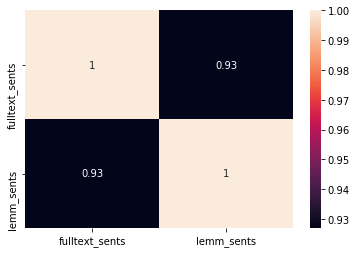

In [23]:
import seaborn as sn
corr = apl_mw_df.corr()
sn.heatmap(corr, annot = True)